In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('weatherAUS.csv',na_values = "")
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


In [3]:
X = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())

2607
660


In [6]:
y_train[(y_train != 'Yes') & (y_train != 'No')]

69818     NaN
117114    NaN
97568     NaN
114019    NaN
42340     NaN
         ... 
127659    NaN
124375    NaN
40397     NaN
124358    NaN
68148     NaN
Name: RainTomorrow, Length: 2607, dtype: object

 Imputing the Target variable with mode

In [7]:
from sklearn.impute import SimpleImputer

imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
y_train_imputer = imp_mode.fit_transform(np.array(y_train).reshape(-1,1))
y_test_imputer = imp_mode.fit_transform(np.array(y_test).reshape(-1,1))


In [8]:
y_train_imputer = y_train_imputer.flatten()
y_test_imputer = y_test_imputer.flatten()

In [9]:
y_train = pd.Series(y_train_imputer,name='RainTomorrow')
y_test = pd.Series(y_test_imputer,name='RainTomorrow')

In [10]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())

0
0


In [11]:
y_train[(y_train != 'Yes') & (y_train != 'No')]

Series([], Name: RainTomorrow, dtype: object)

In [12]:
X_train = X_train.drop(['Date','Location'],axis=1)
X_test = X_test.drop(['Date','Location'],axis=1)

In [13]:
cols = []
for col in X_train.columns:
    if (('am' in col) or ('pm' in col)) and X_train[col].dtype != 'O':
        cols.append(col)

cols

['WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [14]:
mean_cols = {'WindSpeed' : ['WindSpeed9am','WindSpeed3pm'],
             'Humidity' : ['Humidity9am','Humidity3pm'],
             'Pressure' : ['Pressure9am','Pressure3pm'],
             'Cloud' : ['Cloud9am','Cloud3pm'],
             'Temp' : ['Temp9am','Temp3pm']}

In [15]:
X_train[X_train['WindSpeed9am'] == X_train['WindSpeed9am'].isna()]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
111548,14.5,17.8,14.2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,94.0,NaN,1024.1,1022.5,8.0,NaN,16.2,NaN,Yes
71662,3.5,17.2,0.0,1.6,8.8,ENE,30.0,NaN,E,0.0,7.0,87.0,39.0,1030.7,1026.3,1.0,1.0,8.0,16.9,No
77476,6.9,21.9,0.0,2.6,9.8,S,31.0,NaN,S,0.0,19.0,93.0,58.0,1007.6,1006.3,4.0,NaN,13.7,20.5,No
110754,16.1,24.2,0.0,4.0,7.2,NaN,NaN,NaN,SW,0.0,2.0,79.0,67.0,1017.0,1013.8,8.0,2.0,18.9,21.9,No
1983,-1.8,14.0,0.0,NaN,NaN,NNW,13.0,NaN,SSW,0.0,6.0,79.0,48.0,1035.6,1032.0,NaN,NaN,3.5,12.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104488,-0.7,11.8,9.0,1.0,4.6,SSW,30.0,NaN,S,0.0,17.0,90.0,57.0,1029.6,1029.5,2.0,NaN,4.5,10.4,Yes
26854,6.6,25.0,0.0,NaN,NaN,N,15.0,NaN,W,0.0,4.0,77.0,30.0,NaN,NaN,NaN,NaN,13.1,24.4,No
13986,0.4,16.3,0.0,2.8,9.7,SW,26.0,NaN,SW,0.0,9.0,80.0,41.0,1028.8,1024.8,1.0,1.0,6.2,15.6,No
48984,4.6,19.1,0.0,NaN,NaN,ESE,30.0,NaN,ENE,0.0,19.0,79.0,51.0,1027.7,1024.7,1.0,NaN,11.4,18.3,No


In [16]:
print(X_train['WindSpeed9am'].isnull().sum())
print(X_train['WindSpeed3pm'].isnull().sum())

1408
2457


In [17]:
mean_cols

{'WindSpeed': ['WindSpeed9am', 'WindSpeed3pm'],
 'Humidity': ['Humidity9am', 'Humidity3pm'],
 'Pressure': ['Pressure9am', 'Pressure3pm'],
 'Cloud': ['Cloud9am', 'Cloud3pm'],
 'Temp': ['Temp9am', 'Temp3pm']}

In [18]:
def interchanging_the_threeAm_and_ninePm_for_nan_values(mean_cols,train_or_test):
    for name, values in mean_cols.items():
        nine_am_lst = []
        three_pm_lst = []
        for index, row in train_or_test.iterrows():
            
            if str(row[values[0]]) == 'nan':         #values[0] = cols with 9am
                row[values[0]] = row[values[1]]      #values[1] = cols with 3pm

            if str(row[values[1]]) == 'nan':
                row[values[1]] = row[values[0]]

            nine_am_lst.append(row[values[0]])
            three_pm_lst.append(row[values[1]])

        train_or_test[values[0]] = nine_am_lst
        train_or_test[values[1]] = three_pm_lst
        return train_or_test
        

In [19]:
X_train = interchanging_the_threeAm_and_ninePm_for_nan_values(mean_cols,X_train)
X_test = interchanging_the_threeAm_and_ninePm_for_nan_values(mean_cols,X_test)

In [20]:
X_train.isnull().sum()

MinTemp           1178
MaxTemp            998
Rainfall          2604
Evaporation      50329
Sunshine         55942
WindGustDir       8250
WindGustSpeed     8202
WindDir9am        8429
WindDir3pm        3397
WindSpeed9am       964
WindSpeed3pm       964
Humidity9am       2117
Humidity3pm       3616
Pressure9am      12061
Pressure3pm      12042
Cloud9am         44757
Cloud3pm         47548
Temp9am           1405
Temp3pm           2897
RainToday         2604
dtype: int64

In [21]:
X_test.isnull().sum()

MinTemp            307
MaxTemp            263
Rainfall           657
Evaporation      12461
Sunshine         13893
WindGustDir       2076
WindGustSpeed     2061
WindDir9am        2137
WindDir3pm         831
WindSpeed9am       249
WindSpeed3pm       249
Humidity9am        537
Humidity3pm        891
Pressure9am       3004
Pressure3pm       2986
Cloud9am         11131
Cloud3pm         11810
Temp9am            362
Temp3pm            712
RainToday          657
dtype: int64

In [22]:
X_train.shape

(116368, 20)

In [23]:
#training
from operator import add
row_length = X_train.shape[0]
for name,values in mean_cols.items():
    print(values)
    nine_am = []
    three_pm = []
    for num in range(0,row_length):
        
        if str(X_train[values[0]].iloc[num]) == 'nan':
            nine_am.append(X_train[values[1]].iloc[num])
        else:
            nine_am.append(X_train[values[0]].iloc[num])
            
                    
        if str(X_train[values[1]].iloc[num]) == 'nan':
            three_pm.append(X_train[values[0]].iloc[num])
        else:
            three_pm.append(X_train[values[1]].iloc[num])

    X_train[name] = list(map(add, nine_am, three_pm))
    X_train[name] = X_train[name]/2


['WindSpeed9am', 'WindSpeed3pm']
['Humidity9am', 'Humidity3pm']
['Pressure9am', 'Pressure3pm']
['Cloud9am', 'Cloud3pm']
['Temp9am', 'Temp3pm']


In [24]:
X_train.isnull().sum()

MinTemp           1178
MaxTemp            998
Rainfall          2604
Evaporation      50329
Sunshine         55942
WindGustDir       8250
WindGustSpeed     8202
WindDir9am        8429
WindDir3pm        3397
WindSpeed9am       964
WindSpeed3pm       964
Humidity9am       2117
Humidity3pm       3616
Pressure9am      12061
Pressure3pm      12042
Cloud9am         44757
Cloud3pm         47548
Temp9am           1405
Temp3pm           2897
RainToday         2604
WindSpeed          964
Humidity          1504
Pressure         11856
Cloud            41457
Temp               900
dtype: int64

In [25]:
#test
from operator import add
row_length = X_test.shape[0]
for name,values in mean_cols.items():
    print(values)
    nine_am = []
    three_pm = []
    for num in range(0,row_length):
        
        if str(X_test[values[0]].iloc[num]) == 'nan':
            nine_am.append(X_test[values[1]].iloc[num])
        else:
            nine_am.append(X_test[values[0]].iloc[num])

        
        if str(X_test[values[1]].iloc[num]) == 'nan':
            three_pm.append(X_test[values[0]].iloc[num])
        else:
            three_pm.append(X_test[values[1]].iloc[num])

    X_test[name] = list(map(add, nine_am, three_pm))


['WindSpeed9am', 'WindSpeed3pm']
['Humidity9am', 'Humidity3pm']
['Pressure9am', 'Pressure3pm']
['Cloud9am', 'Cloud3pm']
['Temp9am', 'Temp3pm']


In [26]:
X_test.isnull().sum()

MinTemp            307
MaxTemp            263
Rainfall           657
Evaporation      12461
Sunshine         13893
WindGustDir       2076
WindGustSpeed     2061
WindDir9am        2137
WindDir3pm         831
WindSpeed9am       249
WindSpeed3pm       249
Humidity9am        537
Humidity3pm        891
Pressure9am       3004
Pressure3pm       2986
Cloud9am         11131
Cloud3pm         11810
Temp9am            362
Temp3pm            712
RainToday          657
WindSpeed          249
Humidity           383
Pressure          2948
Cloud            10287
Temp               229
dtype: int64

In [27]:
drop_cols = []

for item,values in mean_cols.items():
    drop_cols.append(values[0])
    drop_cols.append(values[1])

In [28]:
drop_cols

['WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [29]:
X_train.drop(labels=drop_cols,axis=1,inplace=True)
X_test.drop(labels=drop_cols,axis=1,inplace=True)

In [30]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,WindSpeed,Humidity,Pressure,Cloud,Temp
111548,14.5,17.8,14.2,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0.0,94.0,1023.30,8.0,16.20
142528,24.6,39.5,0.0,12.0,NaN,SE,31.0,N,NW,No,13.0,36.5,1009.20,3.0,34.65
65304,14.7,26.6,0.2,3.2,8.0,SSE,30.0,SW,S,No,9.0,72.0,1016.80,5.0,20.90
40651,18.3,26.6,0.0,NaN,NaN,SE,28.0,WSW,SSE,No,16.5,73.0,1016.75,6.0,24.20
97487,11.4,19.3,0.6,2.4,8.9,W,31.0,SW,SSW,No,16.0,55.0,1017.85,NaN,16.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,10.0,17.2,0.0,9.6,8.8,NaN,NaN,SW,SSE,No,8.5,58.0,1026.45,4.0,14.90
119879,7.7,21.1,0.0,1.4,8.9,E,35.0,NE,SSE,No,12.0,56.0,1024.85,1.0,16.20
103694,7.6,21.7,0.0,6.0,11.2,SE,39.0,NE,ESE,No,11.5,63.5,1020.35,2.0,17.45
131932,8.8,14.8,0.0,1.2,2.0,NNE,56.0,N,NNE,No,23.5,59.0,994.80,5.0,13.85


<AxesSubplot:>

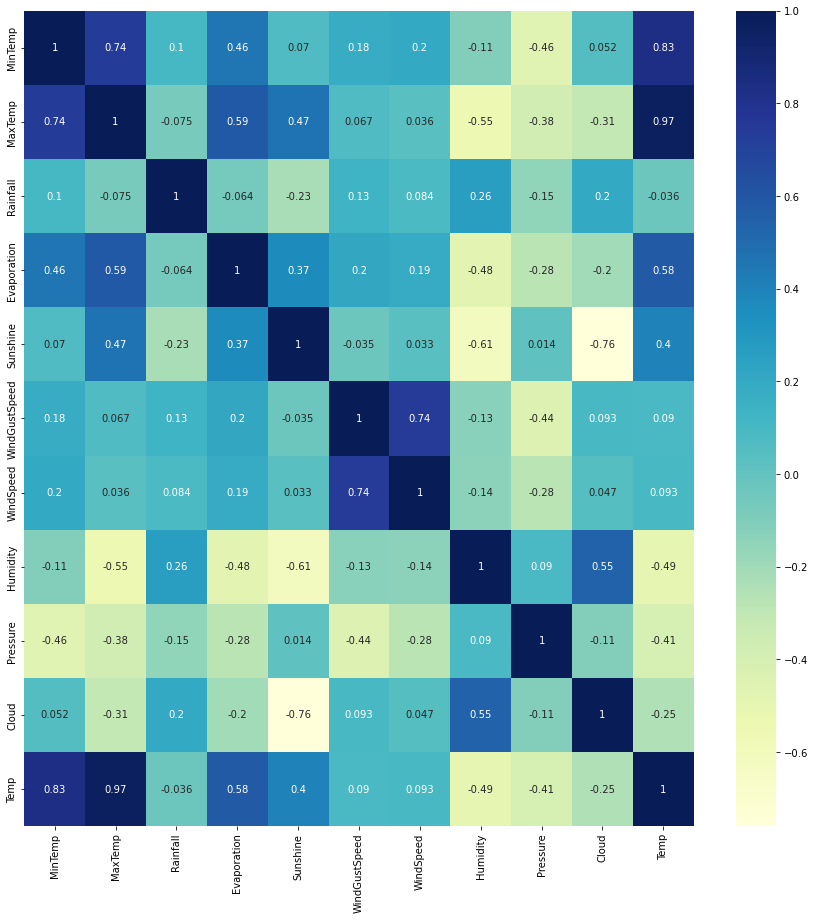

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True,cmap="YlGnBu")

In [32]:
X_train.drop(labels=['MinTemp','MaxTemp'],axis=1,inplace=True)
X_test.drop(labels=['MinTemp','MaxTemp'],axis=1,inplace=True)

# removing the max and min temp since those features are highly positively correlated with Temp feature

In [33]:
X_train

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,WindSpeed,Humidity,Pressure,Cloud,Temp
111548,14.2,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0.0,94.0,1023.30,8.0,16.20
142528,0.0,12.0,NaN,SE,31.0,N,NW,No,13.0,36.5,1009.20,3.0,34.65
65304,0.2,3.2,8.0,SSE,30.0,SW,S,No,9.0,72.0,1016.80,5.0,20.90
40651,0.0,NaN,NaN,SE,28.0,WSW,SSE,No,16.5,73.0,1016.75,6.0,24.20
97487,0.6,2.4,8.9,W,31.0,SW,SSW,No,16.0,55.0,1017.85,NaN,16.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.0,9.6,8.8,NaN,NaN,SW,SSE,No,8.5,58.0,1026.45,4.0,14.90
119879,0.0,1.4,8.9,E,35.0,NE,SSE,No,12.0,56.0,1024.85,1.0,16.20
103694,0.0,6.0,11.2,SE,39.0,NE,ESE,No,11.5,63.5,1020.35,2.0,17.45
131932,0.0,1.2,2.0,NNE,56.0,N,NNE,No,23.5,59.0,994.80,5.0,13.85


In [34]:
# Imputing columns Rainfall,Sunshine,Evaporation with mode value

from sklearn.impute import SimpleImputer

# Training
impute = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer = impute.fit(X_train[['Rainfall','Evaporation','Sunshine']])
X_train[['Rainfall','Evaporation','Sunshine']] = impute.transform(X_train[['Rainfall','Evaporation','Sunshine']])

# Testing
impute = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer = impute.fit(X_test[['Rainfall','Evaporation','Sunshine']])
X_test[['Rainfall','Evaporation','Sunshine']] = impute.transform(X_test[['Rainfall','Evaporation','Sunshine']])

In [35]:
X_train.isnull().sum()

Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       8250
WindGustSpeed     8202
WindDir9am        8429
WindDir3pm        3397
RainToday         2604
WindSpeed          964
Humidity          1504
Pressure         11856
Cloud            41457
Temp               900
dtype: int64

In [36]:
# Imputing columns WindDir9am,WindDir3pm,RainToday,WindGustDir with mode value

from sklearn.impute import SimpleImputer

# Training
impute = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer = impute.fit(X_train[['WindDir9am','WindDir3pm','RainToday','WindGustDir']])
X_train[['WindDir9am','WindDir3pm','RainToday','WindGustDir']] = impute.transform(X_train[['WindDir9am','WindDir3pm','RainToday','WindGustDir']])

# Testing
impute = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer = impute.fit(X_test[['WindDir9am','WindDir3pm','RainToday','WindGustDir']])
X_test[['WindDir9am','WindDir3pm','RainToday','WindGustDir']] = impute.transform(X_test[['WindDir9am','WindDir3pm','RainToday','WindGustDir']])

In [37]:
X_train['Rainfall'].isnull().sum()

0

In [38]:
X_train

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,WindSpeed,Humidity,Pressure,Cloud,Temp
111548,14.2,4.0,0.0,W,NaN,N,SE,Yes,0.0,94.0,1023.30,8.0,16.20
142528,0.0,12.0,0.0,SE,31.0,N,NW,No,13.0,36.5,1009.20,3.0,34.65
65304,0.2,3.2,8.0,SSE,30.0,SW,S,No,9.0,72.0,1016.80,5.0,20.90
40651,0.0,4.0,0.0,SE,28.0,WSW,SSE,No,16.5,73.0,1016.75,6.0,24.20
97487,0.6,2.4,8.9,W,31.0,SW,SSW,No,16.0,55.0,1017.85,NaN,16.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.0,9.6,8.8,W,NaN,SW,SSE,No,8.5,58.0,1026.45,4.0,14.90
119879,0.0,1.4,8.9,E,35.0,NE,SSE,No,12.0,56.0,1024.85,1.0,16.20
103694,0.0,6.0,11.2,SE,39.0,NE,ESE,No,11.5,63.5,1020.35,2.0,17.45
131932,0.0,1.2,2.0,NNE,56.0,N,NNE,No,23.5,59.0,994.80,5.0,13.85


In [39]:
for col in X_train.columns:
    print(col,'- unique :',X_train[col].nunique(),', null : ',X_train[col].isnull().sum())

Rainfall - unique : 650 , null :  0
Evaporation - unique : 338 , null :  0
Sunshine - unique : 145 , null :  0
WindGustDir - unique : 16 , null :  0
WindGustSpeed - unique : 67 , null :  8202
WindDir9am - unique : 16 , null :  0
WindDir3pm - unique : 16 , null :  0
RainToday - unique : 2 , null :  0
WindSpeed - unique : 127 , null :  964
Humidity - unique : 200 , null :  1504
Pressure - unique : 1385 , null :  11856
Cloud - unique : 17 , null :  41457
Temp - unique : 1392 , null :  900


In [40]:
# Imputing columns WindDir9am,WindDir3pm,RainToday,WindGustDir with mode value

from sklearn.impute import SimpleImputer

# Training
impute = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer = impute.fit(X_train[['Cloud']])
X_train[['Cloud']] = impute.transform(X_train[['Cloud']])

# Testing
impute = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer = impute.fit(X_test[['Cloud']])
X_test[['Cloud']] = impute.transform(X_test[['Cloud']])

In [41]:
X_train['Cloud'].unique()

array([8. , 3. , 5. , 6. , 7. , 1. , 7.5, 5.5, 2. , 4. , 2.5, 3.5, 0.5,
       6.5, 4.5, 0. , 1.5])

In [42]:
X_train['Cloud'] = X_train['Cloud'].astype(int)
X_test['Cloud'] = X_test['Cloud'].astype(int)

In [43]:
X_train['Cloud'].unique()

array([8, 3, 5, 6, 7, 1, 2, 4, 0])

In [44]:
for col in X_train.columns:
    print(col,'- unique :',X_train[col].nunique(),', null : ',X_train[col].isnull().sum())

Rainfall - unique : 650 , null :  0
Evaporation - unique : 338 , null :  0
Sunshine - unique : 145 , null :  0
WindGustDir - unique : 16 , null :  0
WindGustSpeed - unique : 67 , null :  8202
WindDir9am - unique : 16 , null :  0
WindDir3pm - unique : 16 , null :  0
RainToday - unique : 2 , null :  0
WindSpeed - unique : 127 , null :  964
Humidity - unique : 200 , null :  1504
Pressure - unique : 1385 , null :  11856
Cloud - unique : 9 , null :  0
Temp - unique : 1392 , null :  900


In [45]:
# Imputing columns WindDir9am,WindDir3pm,RainToday,WindGustDir with mean values

from sklearn.impute import SimpleImputer

# Training
impute = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = impute.fit(X_train[['WindGustSpeed','WindSpeed','Humidity','Pressure','Temp']])
X_train[['WindGustSpeed','WindSpeed','Humidity','Pressure','Temp']] = impute.transform(X_train[['WindGustSpeed','WindSpeed','Humidity','Pressure','Temp']])

# Testing
impute = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = impute.fit(X_test[['WindGustSpeed','WindSpeed','Humidity','Pressure','Temp']])
X_test[['WindGustSpeed','WindSpeed','Humidity','Pressure','Temp']] = impute.transform(X_test[['WindGustSpeed','WindSpeed','Humidity','Pressure','Temp']])

In [46]:
for col in X_train.columns:
    print(col,'- unique :',X_train[col].nunique(),', null : ',X_train[col].isnull().sum())

Rainfall - unique : 650 , null :  0
Evaporation - unique : 338 , null :  0
Sunshine - unique : 145 , null :  0
WindGustDir - unique : 16 , null :  0
WindGustSpeed - unique : 68 , null :  0
WindDir9am - unique : 16 , null :  0
WindDir3pm - unique : 16 , null :  0
RainToday - unique : 2 , null :  0
WindSpeed - unique : 128 , null :  0
Humidity - unique : 201 , null :  0
Pressure - unique : 1386 , null :  0
Cloud - unique : 9 , null :  0
Temp - unique : 1393 , null :  0


In [47]:
X_train['Cloud'].unique()

array([8, 3, 5, 6, 7, 1, 2, 4, 0])

In [48]:
categorical_features = [feature for feature in X_train.columns if X_train[feature].dtype == 'O']
categorical_features

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [49]:
for col in categorical_features:
    print(col,'- unique :',X_train[col].nunique(),', null : ',X_train[col].isnull().sum())

WindGustDir - unique : 16 , null :  0
WindDir9am - unique : 16 , null :  0
WindDir3pm - unique : 16 , null :  0
RainToday - unique : 2 , null :  0


In [50]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

X_train[categorical_features] = X_train[categorical_features].apply(lbl.fit_transform)
X_test[categorical_features] = X_test[categorical_features].apply(lbl.fit_transform)


In [51]:
X_train

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,WindSpeed,Humidity,Pressure,Cloud,Temp
111548,14.2,4.0,0.0,13,40.036056,3,9,1,0.0,94.0,1023.30,8,16.20
142528,0.0,12.0,0.0,9,31.000000,3,7,0,13.0,36.5,1009.20,3,34.65
65304,0.2,3.2,8.0,10,30.000000,12,8,0,9.0,72.0,1016.80,5,20.90
40651,0.0,4.0,0.0,9,28.000000,15,10,0,16.5,73.0,1016.75,6,24.20
97487,0.6,2.4,8.9,13,31.000000,12,11,0,16.0,55.0,1017.85,7,16.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.0,9.6,8.8,13,40.036056,12,10,0,8.5,58.0,1026.45,4,14.90
119879,0.0,1.4,8.9,0,35.000000,4,10,0,12.0,56.0,1024.85,1,16.20
103694,0.0,6.0,11.2,9,39.000000,4,2,0,11.5,63.5,1020.35,2,17.45
131932,0.0,1.2,2.0,5,56.000000,3,5,0,23.5,59.0,994.80,5,13.85


<AxesSubplot:>

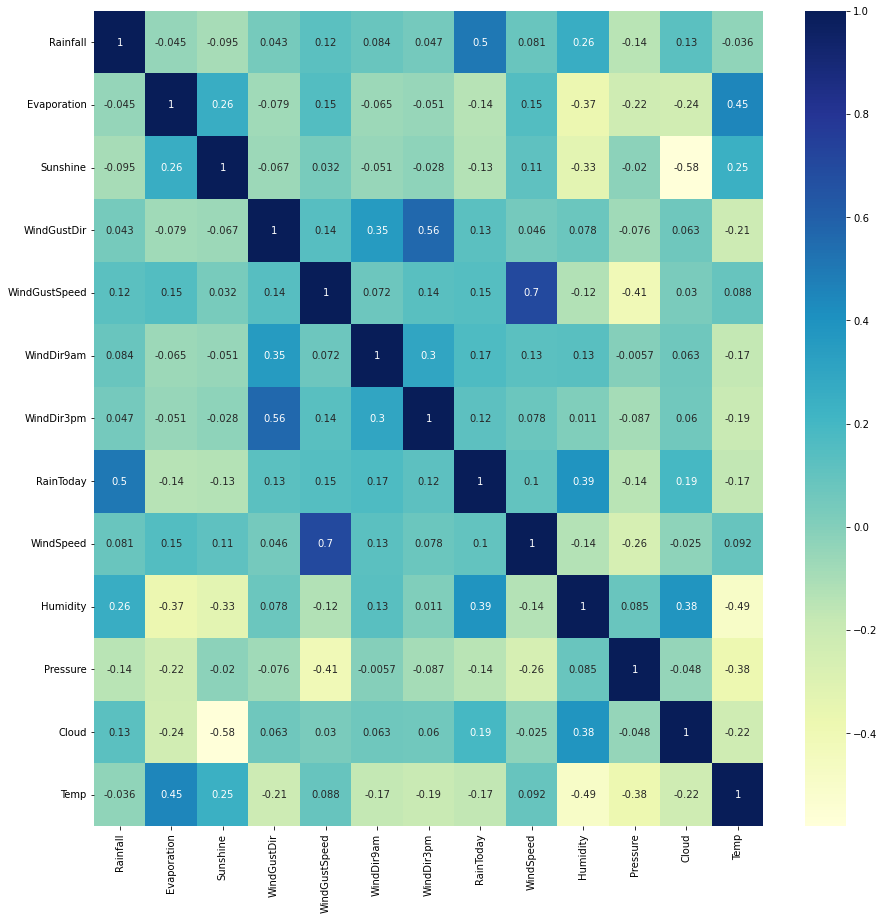

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True,cmap="YlGnBu")

In [53]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [54]:
corr_features = correlation(X_train, 0.75)
corr_features

set()

In [62]:
pd.DataFrame(y_train)

,RainTomorrow
0,Yes
1,No
2,No
3,No
4,No
...,...
116363,No
116364,No
116365,No
116366,No


In [63]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

y_train = pd.DataFrame(y_train).apply(lbl.fit_transform)
y_test = pd.DataFrame(y_test).apply(lbl.fit_transform)


In [64]:
X_train.to_csv('X_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)